# Autoencoder
* https://medium.com/ai-academy-taiwan/what-are-autoencoders-175b474d74d1
* https://morvanzhou.github.io/tutorials/machine-learning/keras/2-6-autoencoder/
* https://github.com/MorvanZhou/tutorials/blob/master/kerasTUT/9-Autoencoder_example.py

In [1]:
SAVE_NAME = '1200_100dim'
HISTORY_SAVE = './history/' + SAVE_NAME + '.csv'
WEIGHTS_SAVE = './weight/' + SAVE_NAME + '.h5'

In [2]:
# Basic import
import os
import sys
import json
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Helper function
def writeProgress(msg, count, total):
    sys.stdout.write(msg + "{:.2%}\r".format(count/total))
    sys.stdout.flush()
    
def newPath(path):
    if not os.path.isdir(path):
        os.mkdir(path)

def read_json(src_path):
    with open(src_path, 'r') as json_file:
        data = json.load(json_file)
    return data

def write_json(data,dst_path):
    with open(dst_path, 'w') as outfile:
        json.dump(data, outfile)

In [4]:
from keras.models import Model
from keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


# Load data

In [5]:
df = pd.read_csv('./input/followingMatrix.csv')
df

,movie,0564905537,1.39am,100soft,1091media,11turkey,13_christina_13,1527john,1605agency,18221sk,...,zombie.lady_,zoodlenoodle,zooeyinthecity,zoos_sa,zowie72209,zreijn,zuinglius,zunmod,zurie_the_gymnast_,zzcloudxp
0,21bridgesmovie,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,47metersdown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,abeautifuldaymovie,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,abominablemovie,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,adastramovie,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,wrinklestheclown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
162,xmenmovies,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
163,yardiefilm,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164,yesterdaymovie,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
x_li = []
y_li = []
for i, row in df.iterrows():
    y_li.append(row['movie'])
    x_li.append(row.iloc[1:].tolist())
    
x = np.asarray(x_li)
y = np.asarray(y_li)
print(x.shape, y.shape)

(166, 13830) (166,)


In [7]:
from sklearn.preprocessing import MinMaxScaler
print(x)
scaler = MinMaxScaler()
scaler.fit(x)
train_scaled = scaler.transform(x)
print(train_scaled.shape)
print(train_scaled)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(166, 13830)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(train_scaled, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(132, 13830) (34, 13830)
(132,) (34,)


In [9]:
input_vec = 13830
encoding_dim = 100

In [10]:
input_dim = Input(shape = (input_vec, ))

# Encoder Layers
encoded1 = Dense(1200, activation = 'relu')(input_dim)
encoded2 = Dense(encoding_dim, activation = 'relu')(encoded1)

# Decoder Layers
decoded1 = Dense(1200, activation = 'relu')(encoded2)
decoded2 = Dense(input_vec, activation = 'sigmoid')(decoded1)

# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_dim, outputs = decoded2)
autoencoder.compile(optimizer = 'Adam', loss = 'binary_crossentropy')

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 13830)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1200)              16597200  
_________________________________________________________________
dense_2 (Dense)              (None, 100)               120100    
_________________________________________________________________
dense_3 (Dense)              (None, 1200)              121200    
_________________________________________________________________
dense_4 (Dense)              (None, 13830)             16609830  
Total params: 33,448,330
Trainable params: 33,448,330
Non-trainable params: 0
_________________________________________________________________


In [12]:
from keras.callbacks import EarlyStopping
callbacks = [EarlyStopping(monitor='val_loss')]

history = autoencoder.fit(X_train, X_train, nb_epoch = 100, batch_size = 50, validation_data = (X_test, X_test),shuffle = True, callbacks=callbacks)

Instructions for updating:
Use tf.cast instead.


/home/tonylab/miniconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 132 samples, validate on 34 samples
Epoch 1/100
132/132 [==============================] - 0s 2ms/step - loss: 0.6922 - val_loss: 0.6890
Epoch 2/100
132/132 [==============================] - 0s 447us/step - loss: 0.6807 - val_loss: 0.6646
Epoch 3/100
132/132 [==============================] - 0s 419us/step - loss: 0.6342 - val_loss: 0.5804
Epoch 4/100
132/132 [==============================] - 0s 427us/step - loss: 0.4670 - val_loss: 0.3814
Epoch 5/100
132/132 [==============================] - 0s 419us/step - loss: 0.2139 - val_loss: 0.1290
Epoch 6/100
132/132 [==============================] - 0s 401us/step - loss: 0.0745 - val_loss: 0.0295
Epoch 7/100
132/132 [==============================] - 0s 407us/step - loss: 0.0546 - val_loss: 0.0173
Epoch 8/100
132/132 [==============================] - 0s 435us/step - loss: 0.0549 - val_loss: 0.0180


In [13]:
autoencoder.save(WEIGHTS_SAVE)

In [14]:
# save history
# acc = history.history['acc']
# val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

his_df = pd.DataFrame(data = {
    'Epoch' : epochs,
    'Loss' : loss,
#     'Acc' : acc,
    'Val_loss' : val_loss#,
#     'Val_acc' : val_acc
})
his_df = his_df[['Epoch', 'Loss','Val_loss']]
his_df.to_csv(HISTORY_SAVE, index = False)

In [15]:
encoder = Model(inputs = input_dim, outputs = encoded2)

encoded_train = pd.DataFrame(encoder.predict(train_scaled))
userContent=np.array(encoded_train)

encoded_train = encoded_train.add_prefix('feature_')
print(encoded_train.shape)
encoded_train #.head()

(166, 100)


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99
0,1.737270,1.606439,2.146086,1.723244,0.0,1.189845,1.879026,0.508158,1.598893,1.557102,...,1.601445,1.474186,1.182993,1.426690,1.523793,1.284553,0.468448,1.546536,1.430479,1.397967
1,1.962254,1.615541,2.307716,1.967337,0.0,1.467739,2.026310,0.777289,1.504779,1.744344,...,1.741058,1.317943,1.473452,1.405926,1.390149,1.400785,0.485005,1.656724,1.173394,1.602583
2,1.436552,1.273627,1.611593,1.398970,0.0,0.936887,1.630154,0.548788,1.170847,1.200495,...,1.225344,1.045262,0.984032,0.994640,1.200526,0.992361,0.342679,1.063319,1.141713,1.237307
3,2.040067,2.032278,2.504837,2.191694,0.0,1.647669,2.232353,0.866529,1.673010,1.848689,...,1.587196,1.536123,1.486318,1.431499,1.588329,1.598817,0.740393,1.644469,1.655631,1.941754
4,0.767345,0.680165,0.842548,0.689263,0.0,0.523671,0.831159,0.311083,0.672463,0.667328,...,0.591188,0.541520,0.520360,0.568199,0.609007,0.608578,0.212628,0.602641,0.609228,0.697638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,1.623283,1.377812,1.730335,1.455693,0.0,1.060927,1.553500,0.566996,1.393174,1.404772,...,1.433729,0.877017,0.974229,1.326355,1.124971,1.155991,0.365393,1.410211,1.173217,1.394719
162,2.267017,2.210661,2.664838,2.269721,0.0,1.564412,2.575962,0.914234,1.818758,2.121861,...,1.810918,1.727851,1.590378,1.720004,1.894474,1.893634,0.720028,1.903134,1.777279,2.248154
163,1.621474,2.236127,2.217307,1.812424,0.0,1.263212,2.500954,0.652332,1.843340,1.864487,...,1.512753,1.196376,1.271129,1.252932,1.619025,1.561910,0.490903,1.768364,1.594258,1.984950
164,0.920287,0.891363,1.144657,0.953585,0.0,0.659229,1.021655,0.433233,0.844091,0.871163,...,0.799489,0.686614,0.699004,0.799460,0.833630,0.788890,0.283858,0.813944,0.775263,0.875817


In [26]:
encoded_train['movie'] = df['movie']
encoded_train = encoded_train.set_index('movie')
encoded_train

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99
movie,,,,,,,,,,,,,,,,,,,,,
21bridgesmovie,1.737270,1.606439,2.146086,1.723244,0.0,1.189845,1.879026,0.508158,1.598893,1.557102,...,1.601445,1.474186,1.182993,1.426690,1.523793,1.284553,0.468448,1.546536,1.430479,1.397967
47metersdown,1.962254,1.615541,2.307716,1.967337,0.0,1.467739,2.026310,0.777289,1.504779,1.744344,...,1.741058,1.317943,1.473452,1.405926,1.390149,1.400785,0.485005,1.656724,1.173394,1.602583
abeautifuldaymovie,1.436552,1.273627,1.611593,1.398970,0.0,0.936887,1.630154,0.548788,1.170847,1.200495,...,1.225344,1.045262,0.984032,0.994640,1.200526,0.992361,0.342679,1.063319,1.141713,1.237307
abominablemovie,2.040067,2.032278,2.504837,2.191694,0.0,1.647669,2.232353,0.866529,1.673010,1.848689,...,1.587196,1.536123,1.486318,1.431499,1.588329,1.598817,0.740393,1.644469,1.655631,1.941754
adastramovie,0.767345,0.680165,0.842548,0.689263,0.0,0.523671,0.831159,0.311083,0.672463,0.667328,...,0.591188,0.541520,0.520360,0.568199,0.609007,0.608578,0.212628,0.602641,0.609228,0.697638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wrinklestheclown,1.623283,1.377812,1.730335,1.455693,0.0,1.060927,1.553500,0.566996,1.393174,1.404772,...,1.433729,0.877017,0.974229,1.326355,1.124971,1.155991,0.365393,1.410211,1.173217,1.394719
xmenmovies,2.267017,2.210661,2.664838,2.269721,0.0,1.564412,2.575962,0.914234,1.818758,2.121861,...,1.810918,1.727851,1.590378,1.720004,1.894474,1.893634,0.720028,1.903134,1.777279,2.248154
yardiefilm,1.621474,2.236127,2.217307,1.812424,0.0,1.263212,2.500954,0.652332,1.843340,1.864487,...,1.512753,1.196376,1.271129,1.252932,1.619025,1.561910,0.490903,1.768364,1.594258,1.984950


In [27]:
encoded_train.to_csv('./output/' + SAVE_NAME + '.csv')

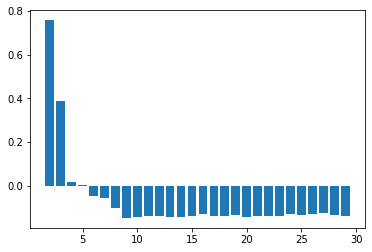

[0.756769313352052, 0.3876697006291677, 0.018660167006993963, 0.0028470579470050716, -0.04794683729393335, -0.05512462102802909, -0.10199639517214645, -0.14662175429217691, -0.14343954450512186, -0.14004924133753852, -0.1398047457936114, -0.14267263077656536, -0.14179812643641507, -0.1380452964788485, -0.1277967986184056, -0.13579038710311295, -0.1363542656892473, -0.13160649691348963, -0.14397041691396426, -0.13950795532257584, -0.13760793148217218, -0.1368431352917535, -0.13015824955019756, -0.13318159698759002, -0.1291973814967136, -0.12587648292894213, -0.13231381862260488, -0.1383985882902529]


In [16]:
from sklearn import cluster, datasets, metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

silhouette_avgs = []
ks = range(2, 30)

for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(encoded_train)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(train_scaled, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 30 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)